In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("sales", axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

In [4]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [5]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
model = DecisionTreeRegressor(random_state=101)
model.fit(X_train, y_train)
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,1.0,0.948877
mae,0.0,0.867500
mse,0.0,1.513750
rmse,0.0,1.230345


In [7]:
from sklearn.model_selection import cross_validate

model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.944905
test_neg_mean_absolute_error       -0.886875
test_neg_mean_squared_error        -1.212562
test_neg_root_mean_squared_error   -1.091125
dtype: float64

In [8]:
from sklearn.model_selection import cross_validate

model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_test, y_test, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.592158
test_neg_mean_absolute_error       -1.667500
test_neg_mean_squared_error        -5.492250
test_neg_root_mean_squared_error   -2.045463
dtype: float64

In [ ]:
Resmen overfitin kralı var. O zaman gridsearchcv ile parametreleri düzenleyeceğiz.

In [12]:
model.feature_importances_

array([0.62727104, 0.36598759, 0.00674137])

In [14]:
df_feature_imp = pd.DataFrame(index= X.columns, data = model.feature_importances_,
                             columns= ["Feature_İmportance"]).sort_values("Feature_İmportance")

df_feature_imp

,Feature_İmportance
newspaper,0.006741
radio,0.365988
TV,0.627271


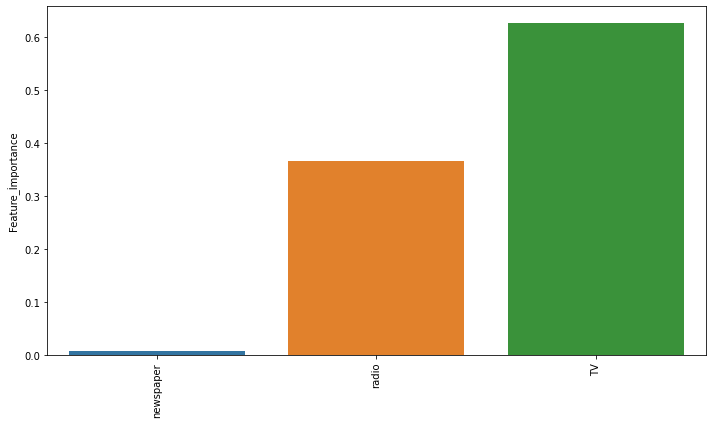

In [15]:
sns.barplot(x = df_feature_imp.index, y = "Feature_İmportance", data = df_feature_imp)
plt.xticks(rotation = 90)
plt.tight_layout()

In [23]:
X_deneme = df.drop(columns= ["newspaper", "sales"], axis=1)
y_deneme = df["sales"]

X_train_deneme, X_test_deneme, y_train_deneme, y_test_deneme = train_test_split(X_deneme, y_deneme, test_size=0.2, random_state = 101)

model = DecisionTreeRegressor(random_state=101)
model.fit(X_train_deneme, y_train_deneme)
train_val(model, X_train_deneme, y_train_deneme, X_test_deneme, y_test_deneme)

,train,test
R2,1.0,0.971336
mae,0.0,0.692500
mse,0.0,0.848750
rmse,0.0,0.921276


In [24]:
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_train_deneme, y_train_deneme, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.961046
test_neg_mean_absolute_error       -0.768125
test_neg_mean_squared_error        -0.880062
test_neg_root_mean_squared_error   -0.924320
dtype: float64

In [25]:
model = DecisionTreeRegressor(random_state=101)
scores = cross_validate(model, X_test_deneme, y_test_deneme, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_r2                             0.613811
test_neg_mean_absolute_error       -1.492500
test_neg_mean_squared_error        -3.996250
test_neg_root_mean_squared_error   -1.803273
dtype: float64

### En az futureyi eleyince skorlar bayağı arttı : 

#### DecisionTree Regresyon için parametreler :

#### criterion :
mse yi 0 değerine yaklaştırmaya çalışırız. mse bize varyansı göstermektedir. burda ayrımı fiyatları birbirlerine yakın olan arabalara göre yapacak. Default olarak mse değerlerine göre ayrım yapar.

#### Max_depth :
en önemli parametredir. classifier gibi ağacın dallanma sayısını belirtir.

In [26]:
from sklearn.model_selection import GridSearchCV

model = DecisionTreeRegressor(random_state=101)

param_grid = {"splitter":["best", "random"],
            "max_depth": [None, 4, 5, 6, 7,8,9,10],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6,7],
             "min_samples_split": [2, 3, 5, 6, 7,8,9],
             'criterion' : ["mse", "rmse"],
             'ccp_alpha' : np.linspace(0,5,20)}

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

grid_model.fit(X_train_deneme,y_train_deneme)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ]),
                         'criterion': ['mse', 'rmse'],
                         'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='neg_root_mean_squared_error')

In [27]:
grid_model.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [28]:
train_val(grid_model, X_train_deneme, y_train_deneme, X_test_deneme, y_test_deneme)

,train,test
R2,0.998339,0.971011
mae,0.142167,0.718750
mse,0.043899,0.858382
rmse,0.209521,0.926489
